In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")

In [2]:
data=pd.read_csv("Sales.csv")
data.head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418


In [3]:
data.shape

(113036, 18)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113036 entries, 0 to 113035
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Date              113036 non-null  object
 1   Day               113036 non-null  int64 
 2   Month             113036 non-null  object
 3   Year              113036 non-null  int64 
 4   Customer_Age      113036 non-null  int64 
 5   Age_Group         113036 non-null  object
 6   Customer_Gender   113036 non-null  object
 7   Country           113036 non-null  object
 8   State             113036 non-null  object
 9   Product_Category  113036 non-null  object
 10  Sub_Category      113036 non-null  object
 11  Product           113036 non-null  object
 12  Order_Quantity    113036 non-null  int64 
 13  Unit_Cost         113036 non-null  int64 
 14  Unit_Price        113036 non-null  int64 
 15  Profit            113036 non-null  int64 
 16  Cost              113036 non-null  int

In [5]:
data= data.drop(columns=["Day","Month","Year"])

In [6]:
data['Date'] = pd.to_datetime(data['Date'])

In [7]:
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Weekday'] = data['Date'].dt.weekday

In [8]:
data=data.drop(columns=["Date"])

In [9]:
data.head()

,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue,Year,Month,Weekday
0,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950,2013,11,1
1,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950,2015,11,3
2,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401,2014,3,6
3,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088,2016,3,2
4,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418,2014,5,3


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113036 entries, 0 to 113035
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Customer_Age      113036 non-null  int64 
 1   Age_Group         113036 non-null  object
 2   Customer_Gender   113036 non-null  object
 3   Country           113036 non-null  object
 4   State             113036 non-null  object
 5   Product_Category  113036 non-null  object
 6   Sub_Category      113036 non-null  object
 7   Product           113036 non-null  object
 8   Order_Quantity    113036 non-null  int64 
 9   Unit_Cost         113036 non-null  int64 
 10  Unit_Price        113036 non-null  int64 
 11  Profit            113036 non-null  int64 
 12  Cost              113036 non-null  int64 
 13  Revenue           113036 non-null  int64 
 14  Year              113036 non-null  int32 
 15  Month             113036 non-null  int32 
 16  Weekday           113036 non-null  int

In [11]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Customer_Age,113036.0,35.919212,11.021936,17.0,28.0,35.0,43.0,87.0
Order_Quantity,113036.0,11.901660,9.561857,1.0,2.0,10.0,20.0,32.0
Unit_Cost,113036.0,267.296366,549.835483,1.0,2.0,9.0,42.0,2171.0
Unit_Price,113036.0,452.938427,922.071219,2.0,5.0,24.0,70.0,3578.0
Profit,113036.0,285.051665,453.887443,-30.0,29.0,101.0,358.0,15096.0
Cost,113036.0,469.318695,884.866118,1.0,28.0,108.0,432.0,42978.0
Revenue,113036.0,754.370360,1309.094674,2.0,63.0,223.0,800.0,58074.0
Year,113036.0,2014.401739,1.272510,2011.0,2013.0,2014.0,2016.0,2016.0
Month,113036.0,6.453024,3.478198,1.0,4.0,6.0,10.0,12.0
Weekday,113036.0,3.014942,1.996887,0.0,1.0,3.0,5.0,6.0


In [12]:
data.isnull().values.any()

np.False_

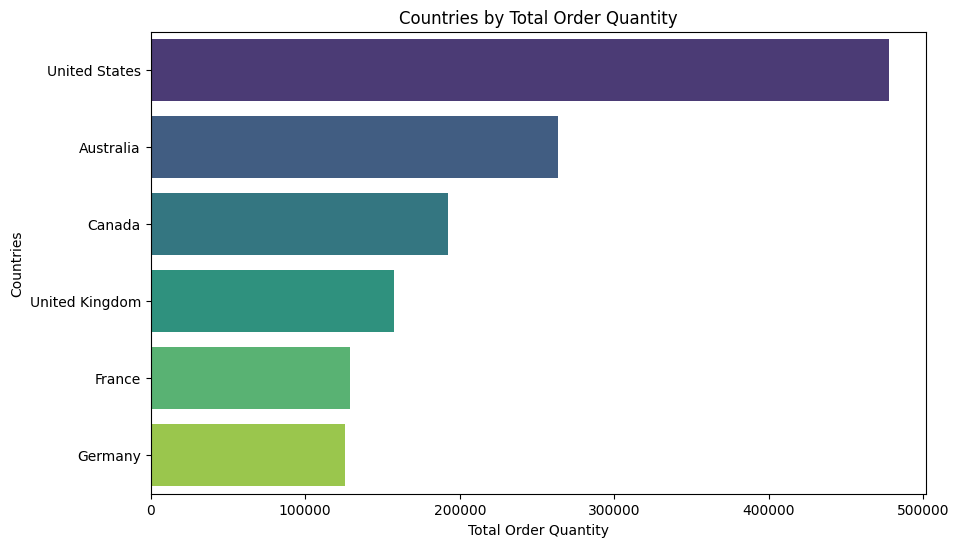

In [13]:
#ülkelerin toplam siparişleri
countries_order=data.groupby("Country")["Order_Quantity"].sum().sort_values(ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(x=countries_order.values,y=countries_order.index,palette="viridis")
plt.title("Countries by Total Order Quantity")
plt.xlabel("Total Order Quantity")
plt.ylabel("Countries")
plt.show()

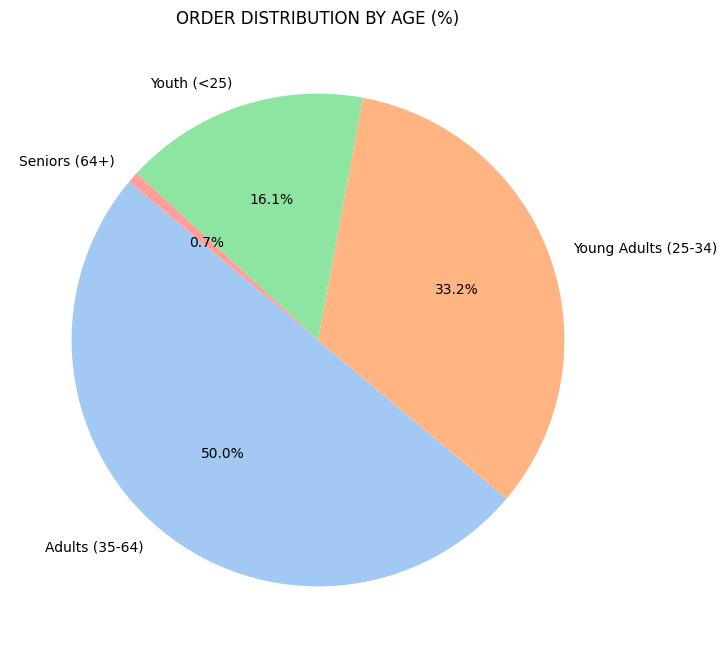

Age_Group
Adults (35-64)          672417
Young Adults (25-34)    446875
Youth (<25)             216147
Seniors (64+)             9877
Name: Order_Quantity, dtype: int64

In [14]:
age_group_orders=data.groupby("Age_Group")["Order_Quantity"].sum().sort_values(ascending=False)
plt.figure(figsize=(8, 8))
plt.pie(age_group_orders, labels=age_group_orders.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
plt.title("ORDER DISTRIBUTION BY AGE (%)")
plt.show()

data.groupby("Age_Group")["Order_Quantity"].sum().sort_values(ascending=False)

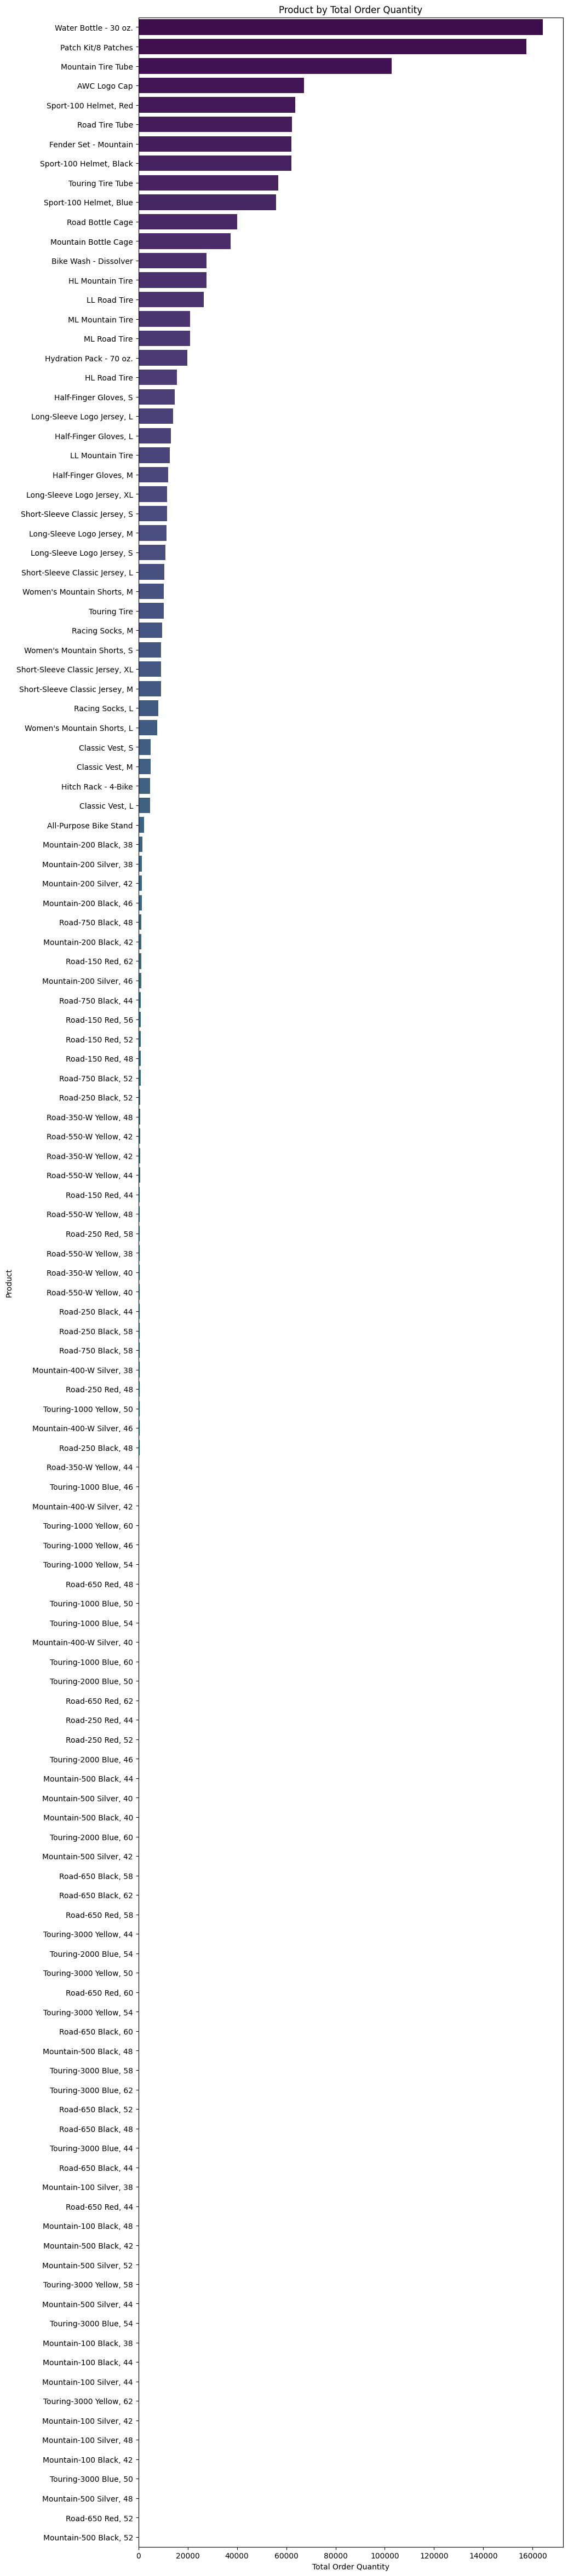

In [15]:
product_group_orders=data.groupby("Product")["Order_Quantity"].sum().sort_values(ascending=False)
plt.figure(figsize=(10,60))
sns.barplot(x=product_group_orders.values,y=product_group_orders.index,palette="viridis")
plt.title("Product by Total Order Quantity")
plt.xlabel("Total Order Quantity")
plt.ylabel("Product")
plt.show()




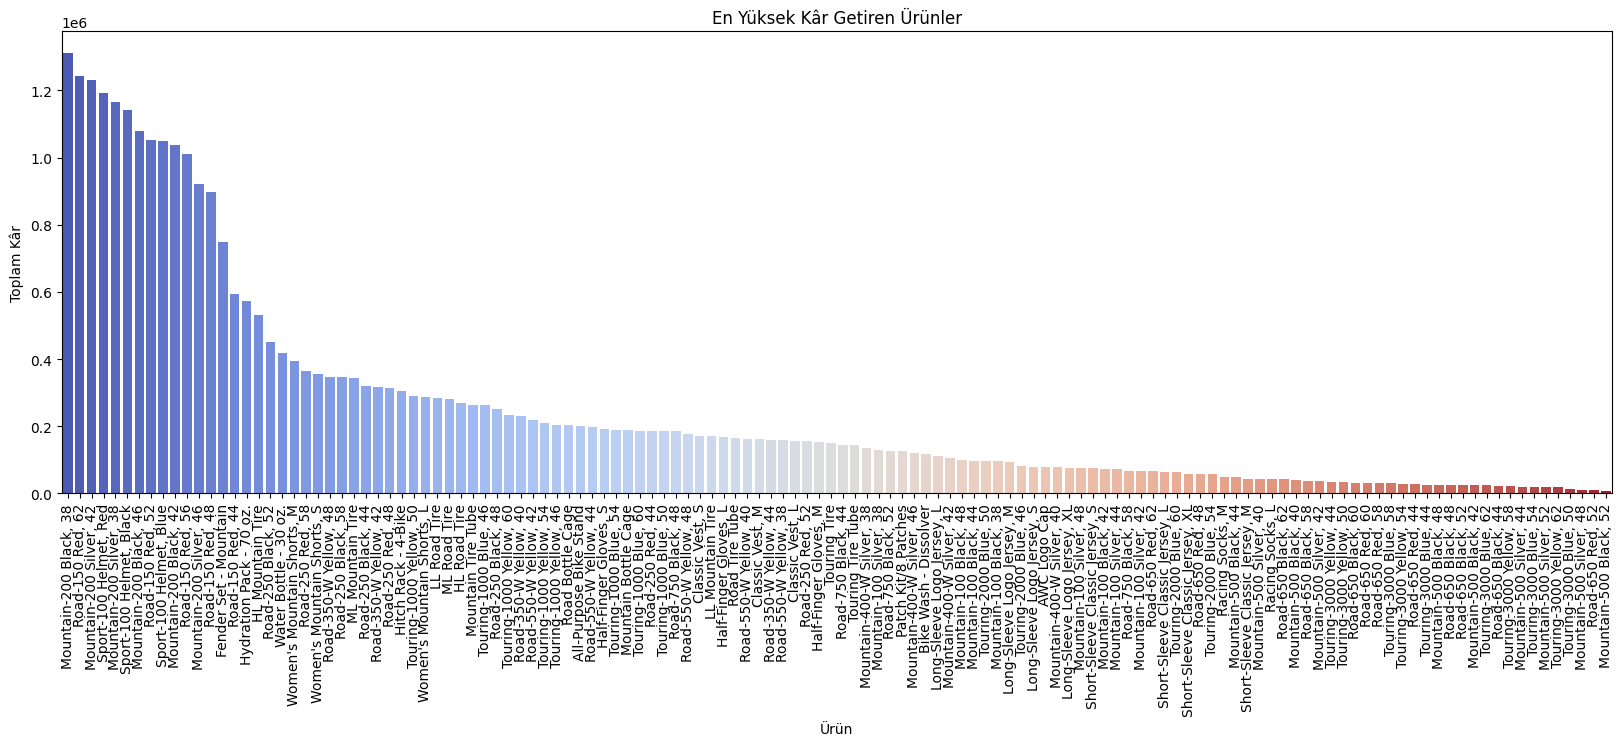

In [16]:
top_products_profit = data.groupby("Product")["Profit"].sum().sort_values(ascending=False)

plt.figure(figsize=(20, 6))
sns.barplot(x=top_products_profit.index, y=top_products_profit.values, palette="coolwarm")
plt.title("En Yüksek Kâr Getiren Ürünler")
plt.xlabel("Ürün")
plt.ylabel("Toplam Kâr")
plt.xticks(rotation=90)
plt.show()

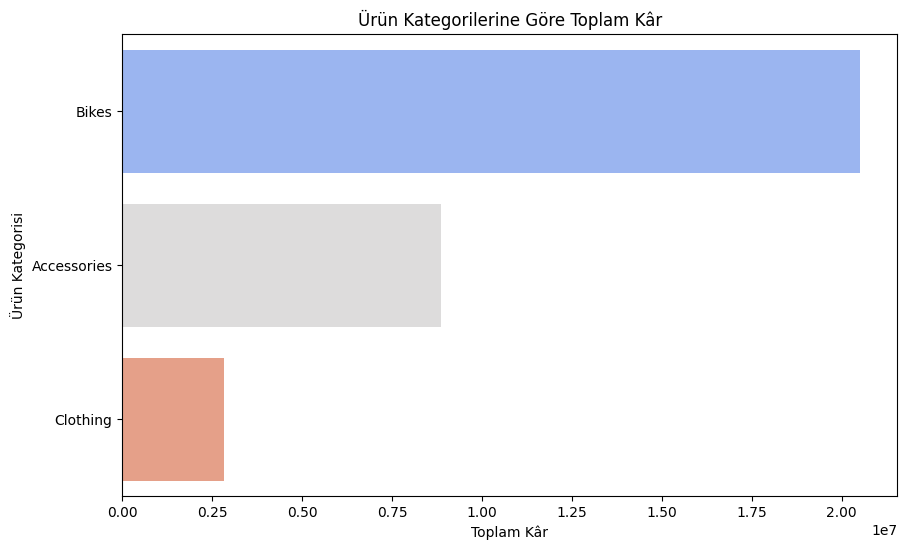

In [17]:
# Ürün kategori bazlı elde edilen kâr
product_category_profit = data.groupby("Product_Category")["Profit"].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=product_category_profit.values, y=product_category_profit.index, palette="coolwarm")
plt.title("Ürün Kategorilerine Göre Toplam Kâr")
plt.xlabel("Toplam Kâr")
plt.ylabel("Ürün Kategorisi")
plt.show()


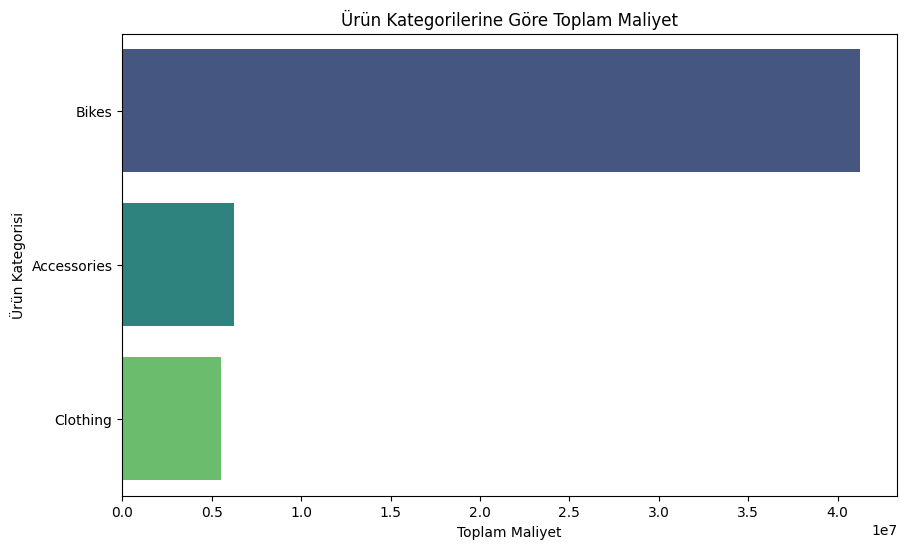

In [18]:
# Ürün kategori bazlı maliyet
product_category_cost = data.groupby("Product_Category")["Cost"].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=product_category_cost.values, y=product_category_cost.index, palette="viridis")
plt.title("Ürün Kategorilerine Göre Toplam Maliyet")
plt.xlabel("Toplam Maliyet")
plt.ylabel("Ürün Kategorisi")
plt.show()


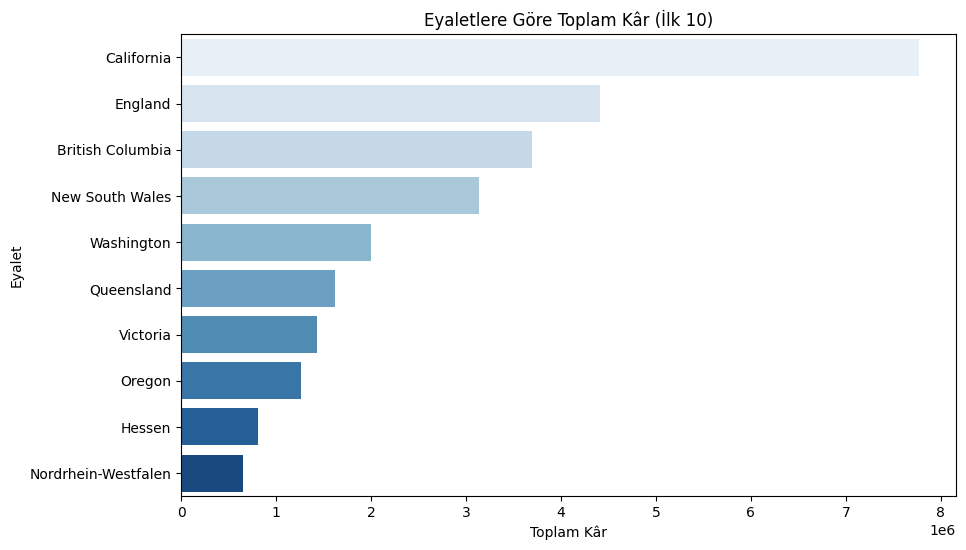

In [19]:
# Eyalet bazlı kâr
state_profit = data.groupby("State")["Profit"].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=state_profit.values, y=state_profit.index, palette="Blues")
plt.title("Eyaletlere Göre Toplam Kâr (İlk 10)")
plt.xlabel("Toplam Kâr")
plt.ylabel("Eyalet")
plt.show()

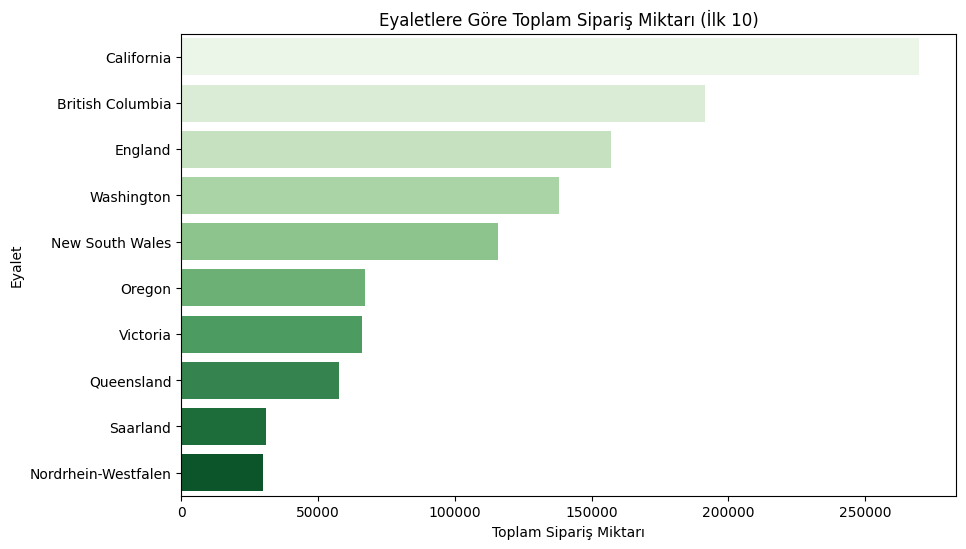

In [20]:
# Eyalet bazlı siparişler
state_orders = data.groupby("State")["Order_Quantity"].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=state_orders.values, y=state_orders.index, palette="Greens")
plt.title("Eyaletlere Göre Toplam Sipariş Miktarı (İlk 10)")
plt.xlabel("Toplam Sipariş Miktarı")
plt.ylabel("Eyalet")
plt.show()

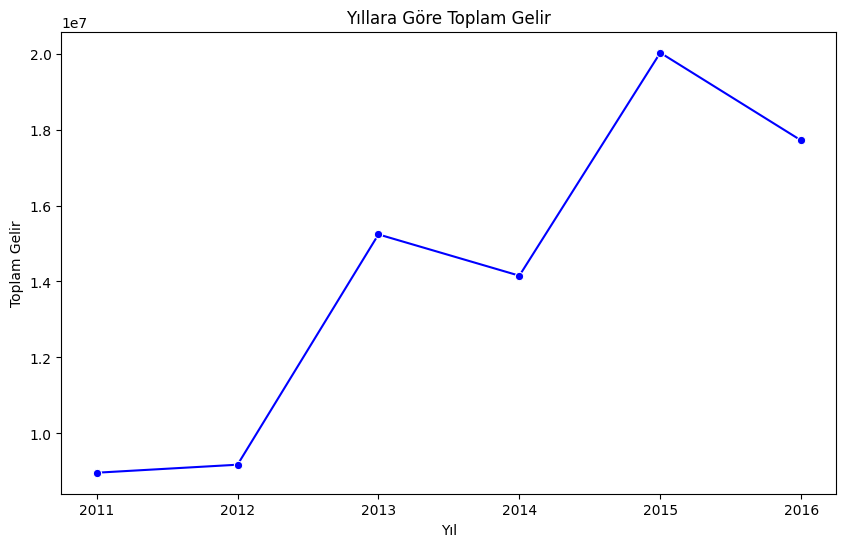

In [21]:
# Yıllara göre elde edilen toplam gelir
yearly_revenue = data.groupby("Year")["Revenue"].sum()

plt.figure(figsize=(10, 6))
sns.lineplot(x=yearly_revenue.index, y=yearly_revenue.values, marker="o", color="b")
plt.title("Yıllara Göre Toplam Gelir")
plt.xlabel("Yıl")
plt.ylabel("Toplam Gelir")
plt.show()

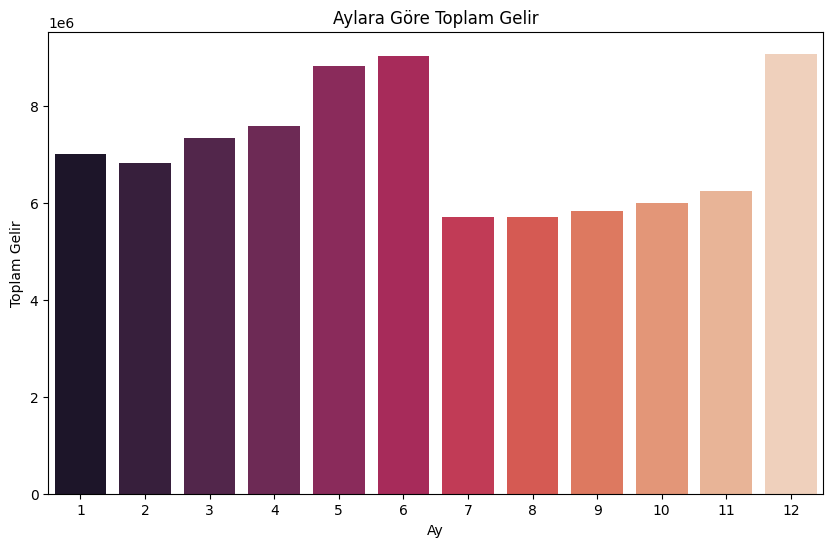

In [22]:
# Aylara göre elde edilen toplam gelir
monthly_revenue = data.groupby("Month")["Revenue"].sum()

plt.figure(figsize=(10, 6))
sns.barplot(x=monthly_revenue.index, y=monthly_revenue.values, palette="rocket")
plt.title("Aylara Göre Toplam Gelir")
plt.xlabel("Ay")
plt.ylabel("Toplam Gelir")
plt.show()

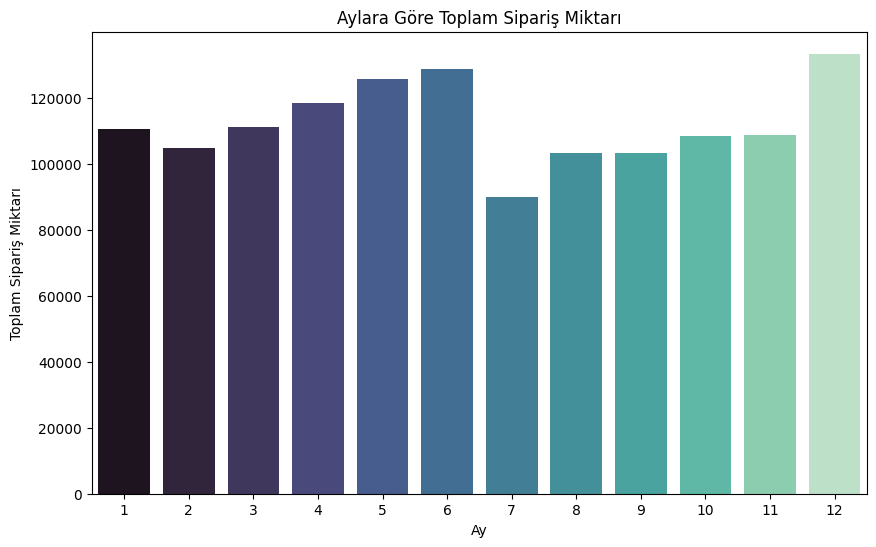

In [23]:
# Aylara göre toplam sipariş miktarı
monthly_orders = data.groupby("Month")["Order_Quantity"].sum()

plt.figure(figsize=(10, 6))
sns.barplot(x=monthly_orders.index, y=monthly_orders.values, palette="mako")
plt.title("Aylara Göre Toplam Sipariş Miktarı")
plt.xlabel("Ay")
plt.ylabel("Toplam Sipariş Miktarı")
plt.show()

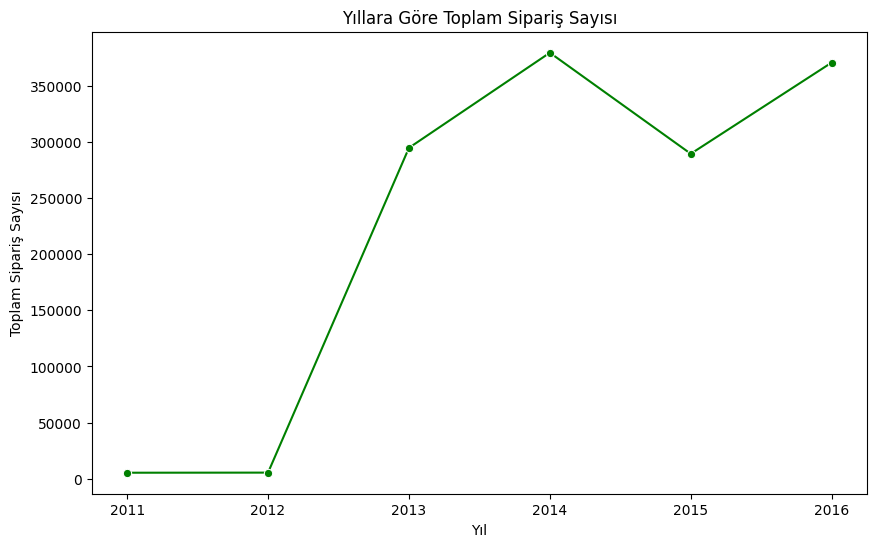

In [24]:
# Yıllara göre toplam sipariş sayısı
yearly_orders = data.groupby("Year")["Order_Quantity"].sum()

plt.figure(figsize=(10, 6))
sns.lineplot(x=yearly_orders.index, y=yearly_orders.values, marker="o", color="g")
plt.title("Yıllara Göre Toplam Sipariş Sayısı")
plt.xlabel("Yıl")
plt.ylabel("Toplam Sipariş Sayısı")
plt.show()

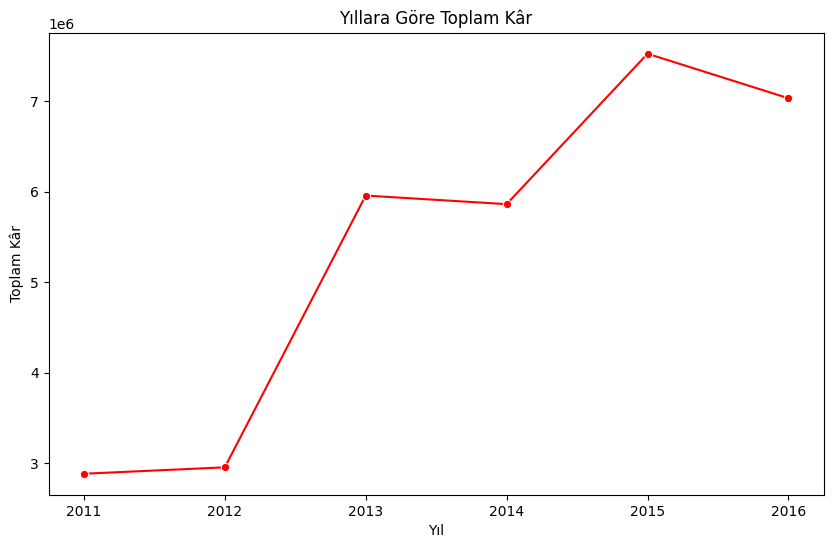

In [25]:
# Yıllara göre toplam kâr
yearly_profit = data.groupby("Year")["Profit"].sum()

plt.figure(figsize=(10, 6))
sns.lineplot(x=yearly_profit.index, y=yearly_profit.values, marker="o", color="r")
plt.title("Yıllara Göre Toplam Kâr")
plt.xlabel("Yıl")
plt.ylabel("Toplam Kâr")
plt.show()

In [26]:
#cinsiyetlere göre yaş ortalaması ve sipariş sayıları
data.groupby("Customer_Gender").agg({"Customer_Age": ["mean"],"Order_Quantity": "mean"})

,Customer_Age,Order_Quantity
,mean,mean
Customer_Gender,,
F,36.168993,11.799814
M,35.684799,11.997239


In [27]:
#ülkelere göre yaş oralaması ve sipariş ortalamaları
data.groupby("Country").agg({"Customer_Age": ["mean"],"Order_Quantity": "mean"})

,Customer_Age,Order_Quantity
,mean,mean
Country,,
Australia,34.383941,11.012074
Canada,36.238962,13.560375
France,35.116930,11.728951
Germany,34.868084,11.328167
United Kingdom,35.551836,11.543172
United States,37.391114,12.180253


In [28]:
#ülkelere göre maliyetler,karlar,gelirler
data.groupby("Country").agg({"Revenue": "mean","Profit": "mean","Cost": "mean"})

,Revenue,Profit,Cost
Country,,,
Australia,889.959016,283.089489,606.869527
Canada,559.721964,262.187615,297.534349
France,766.764139,261.891435,504.872704
Germany,809.028293,302.756803,506.271490
United Kingdom,781.659031,324.071439,457.587592
United States,713.552696,282.447687,431.105009


In [29]:
#ürünlere göre maliyetler,karlar,gelirler
data.groupby("Product").agg({"Revenue": "mean","Profit": "mean","Cost": "mean"})

,Revenue,Profit,Cost
Product,,,
AWC Logo Cap,126.025700,17.899954,108.125746
All-Purpose Bike Stand,758.106195,444.831858,313.274336
Bike Wash - Dissolver,110.169069,64.305987,45.863082
"Classic Vest, L",845.732704,494.713836,351.018868
"Classic Vest, M",871.137500,505.437500,365.700000
...,...,...,...
"Touring-3000 Yellow, 62",786.583333,255.152778,531.430556
Water Bottle - 30 oz.,69.113860,38.710673,30.403187
"Women's Mountain Shorts, L",938.331395,554.377907,383.953488


In [30]:
#ürün kategori bazlı göre maliyetler,karlar,gelirler
data.groupby("Product_Category").agg({"Revenue": "mean","Profit": "mean","Cost": "mean"})

,Revenue,Profit,Cost
Product_Category,,,
Accessories,215.601711,126.388719,89.212992
Bikes,2377.882149,789.749673,1588.132476
Clothing,494.323964,167.677276,326.646687


In [31]:
#aylara göre ürünlere ait oplam karlar
pd.pivot_table(data, values='Profit', index='Product', columns='Month', aggfunc='sum')

Month,1,2,3,4,5,6,7,8,9,10,11,12
Product,,,,,,,,,,,,
AWC Logo Cap,6494.0,6051.0,6361.0,7107.0,7173.0,8600.0,4951.0,6409.0,5233.0,6036.0,5769.0,7824.0
All-Purpose Bike Stand,12002.0,11454.0,10681.0,22701.0,18851.0,11309.0,8981.0,18988.0,16449.0,23094.0,22969.0,23585.0
Bike Wash - Dissolver,9429.0,10010.0,7741.0,9317.0,11567.0,13147.0,8228.0,8473.0,7915.0,10213.0,8737.0,11231.0
"Classic Vest, L",18433.0,11336.0,16915.0,11477.0,8621.0,12284.0,19498.0,10576.0,6960.0,13134.0,17560.0,10525.0
"Classic Vest, M",14004.0,11769.0,10430.0,17994.0,9042.0,12216.0,7330.0,15837.0,16641.0,14760.0,17147.0,14570.0
...,...,...,...,...,...,...,...,...,...,...,...,...
"Touring-3000 Yellow, 62",2083.0,902.0,902.0,2875.0,1876.0,370.0,1980.0,2409.0,554.0,1420.0,250.0,2750.0
Water Bottle - 30 oz.,32057.0,33422.0,39659.0,40066.0,41888.0,42188.0,23379.0,30199.0,32160.0,30898.0,29727.0,42200.0
"Women's Mountain Shorts, L",21633.0,25618.0,12897.0,30278.0,27060.0,21522.0,17531.0,23477.0,26319.0,15947.0,26276.0,37501.0


In [32]:
#ürünlerin ay olarak toplam karları
pd.pivot_table(data, values='Profit', index='Product', columns='Month', aggfunc='sum')

Month,1,2,3,4,5,6,7,8,9,10,11,12
Product,,,,,,,,,,,,
AWC Logo Cap,6494.0,6051.0,6361.0,7107.0,7173.0,8600.0,4951.0,6409.0,5233.0,6036.0,5769.0,7824.0
All-Purpose Bike Stand,12002.0,11454.0,10681.0,22701.0,18851.0,11309.0,8981.0,18988.0,16449.0,23094.0,22969.0,23585.0
Bike Wash - Dissolver,9429.0,10010.0,7741.0,9317.0,11567.0,13147.0,8228.0,8473.0,7915.0,10213.0,8737.0,11231.0
"Classic Vest, L",18433.0,11336.0,16915.0,11477.0,8621.0,12284.0,19498.0,10576.0,6960.0,13134.0,17560.0,10525.0
"Classic Vest, M",14004.0,11769.0,10430.0,17994.0,9042.0,12216.0,7330.0,15837.0,16641.0,14760.0,17147.0,14570.0
...,...,...,...,...,...,...,...,...,...,...,...,...
"Touring-3000 Yellow, 62",2083.0,902.0,902.0,2875.0,1876.0,370.0,1980.0,2409.0,554.0,1420.0,250.0,2750.0
Water Bottle - 30 oz.,32057.0,33422.0,39659.0,40066.0,41888.0,42188.0,23379.0,30199.0,32160.0,30898.0,29727.0,42200.0
"Women's Mountain Shorts, L",21633.0,25618.0,12897.0,30278.0,27060.0,21522.0,17531.0,23477.0,26319.0,15947.0,26276.0,37501.0


In [33]:
#ürümleri ülkelere göre kar toplamları
pd.pivot_table(data, values='Profit', index='Product', columns='Country', aggfunc='sum')

Country,Australia,Canada,France,Germany,United Kingdom,United States
Product,,,,,,
AWC Logo Cap,7563.0,14188.0,5280.0,9102.0,16825.0,25050.0
All-Purpose Bike Stand,52881.0,22137.0,15969.0,16504.0,25941.0,67632.0
Bike Wash - Dissolver,25461.0,19172.0,6123.0,7936.0,11596.0,45720.0
"Classic Vest, L",25762.0,35540.0,19688.0,17970.0,13405.0,44954.0
"Classic Vest, M",31835.0,23418.0,14096.0,16055.0,21790.0,54546.0
...,...,...,...,...,...,...
"Touring-3000 Yellow, 62",2720.0,1095.0,1547.0,6271.0,NaN,6738.0
Water Bottle - 30 oz.,72924.0,67836.0,34104.0,31240.0,55298.0,156441.0
"Women's Mountain Shorts, L",36342.0,64171.0,16617.0,3798.0,14954.0,150177.0


In [34]:
yearly_sales = data.groupby('Year').agg({
    'Order_Quantity': 'sum',
    'Revenue': 'sum',
    'Profit':'sum'
}).reset_index()

<Axes: >

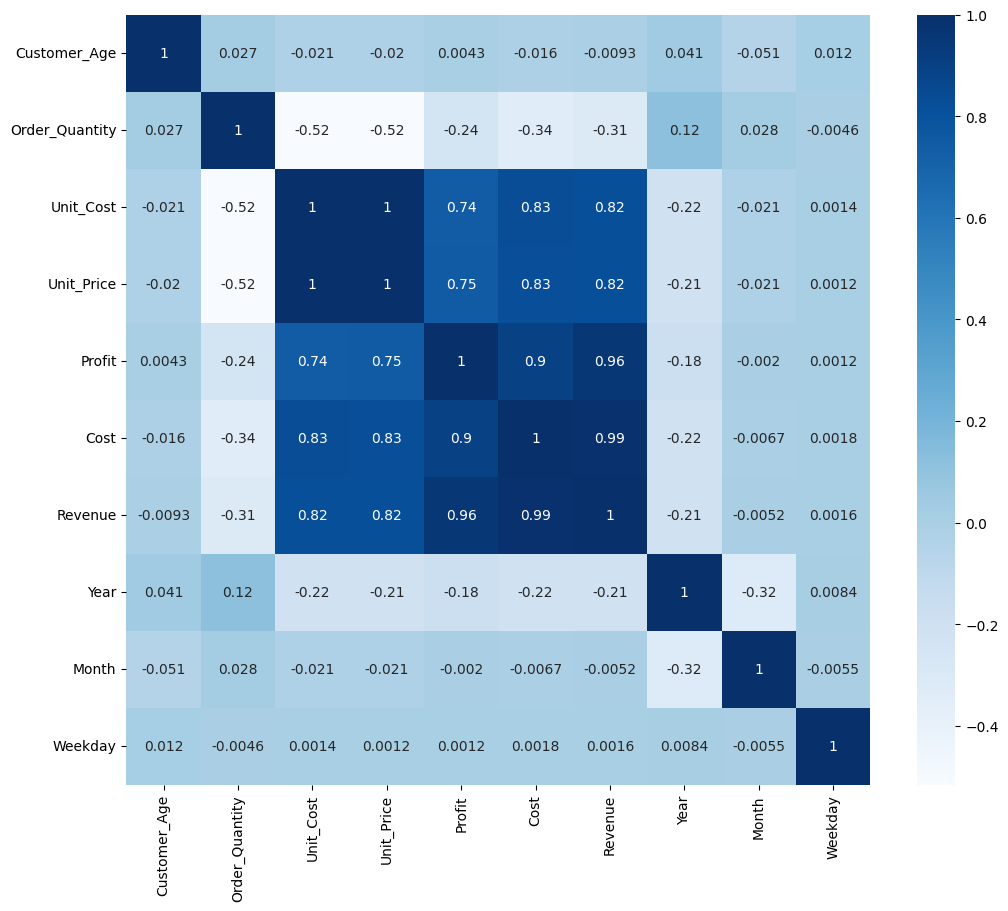

In [35]:
plt.figure(figsize=(12,10))
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap='Blues')

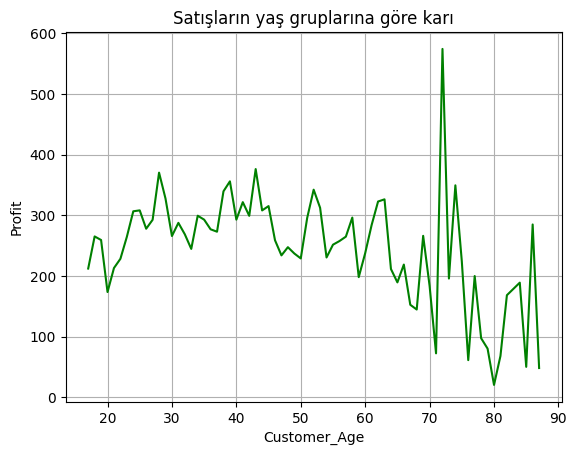

In [36]:
#müşteri yaşlarına göre elde edilen kar
sns.lineplot(data=data, x="Customer_Age", y="Profit",ci=None,color="green")
plt.title('Satışların yaş gruplarına göre karı')
plt.grid(True)

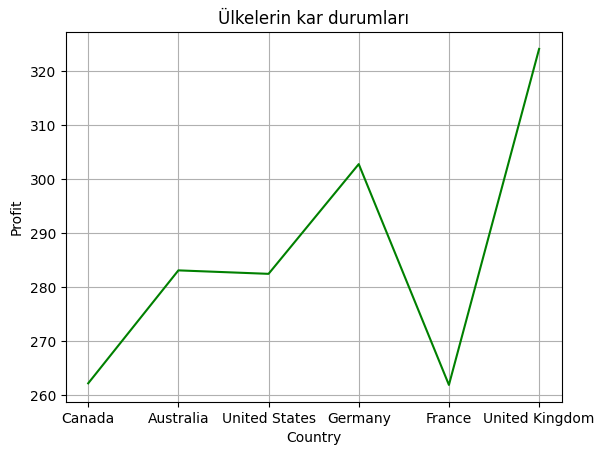

In [37]:
#Ülkelere göre elde edilen karlar
sns.lineplot(data=data, x="Country", y="Profit",ci=None,color="green")
plt.title('Ülkelerin kar durumları')
plt.grid(True)

Text(0.5, 1.0, 'Yaş Dağılımı')

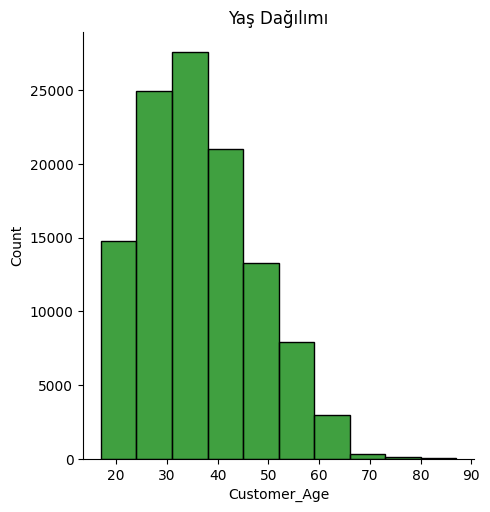

In [38]:
sns.displot(data=data, x="Customer_Age",bins=10,color="green")
plt.title('Yaş Dağılımı')

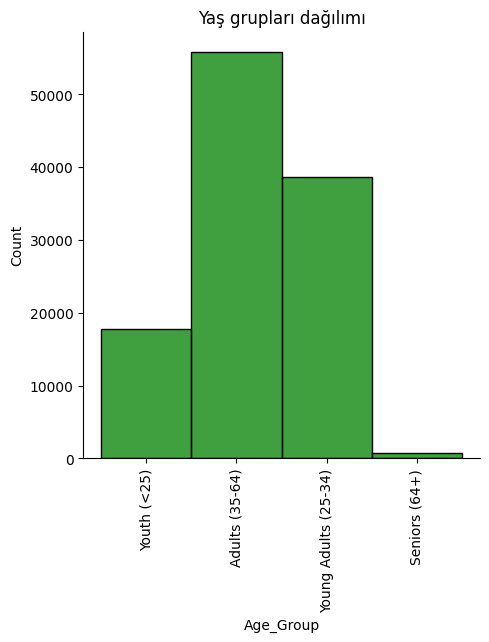

In [39]:
#Yaş grupları dağılımı
sns.displot(data=data, x="Age_Group",bins=30,color="green")
plt.title('Yaş grupları dağılımı')
plt.xticks(rotation=90)
plt.show()

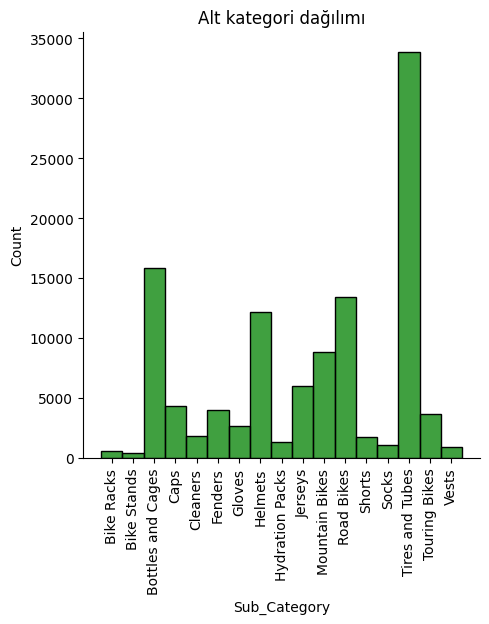

In [40]:
sns.displot(data=data, x="Sub_Category",bins=40,color="green")
plt.title("Alt kategori dağılımı")
plt.xticks(rotation=90)
plt.show()

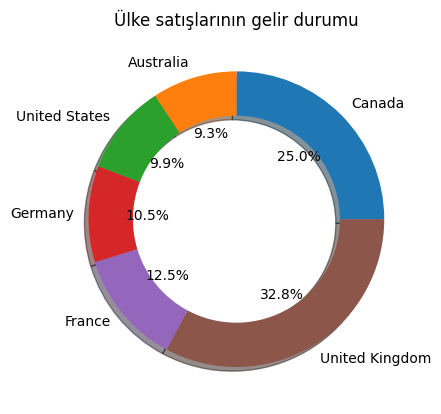

In [41]:
labels=data["Country"].unique()
views=data.groupby("Country")["Revenue"].sum()
plt.pie(views,labels=labels,autopct="%1.1f%%",shadow=True,wedgeprops={"width":0.3})
plt.title('Ülke satışlarının gelir durumu')
plt.show()

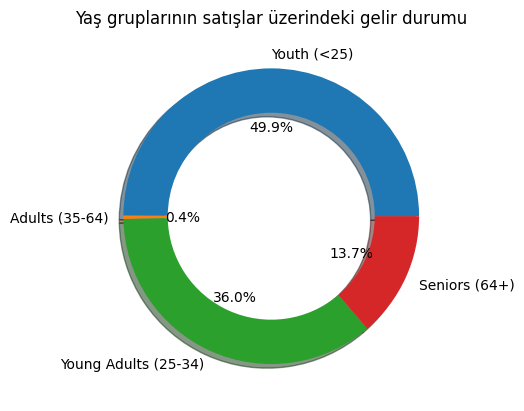

In [42]:
labels=data["Age_Group"].unique()
views=data.groupby("Age_Group")["Revenue"].sum()
plt.pie(views,labels=labels,autopct="%1.1f%%",shadow=True,wedgeprops={"width":0.3})
plt.title('Yaş gruplarının satışlar üzerindeki gelir durumu')
plt.show()

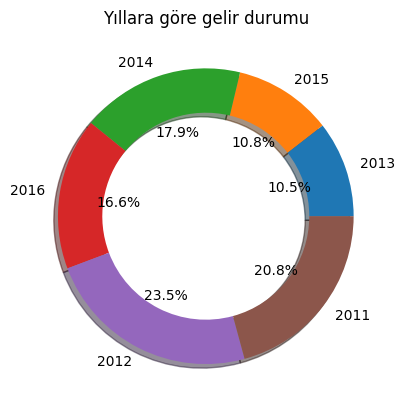

In [43]:
labels=data["Year"].unique()
views=data.groupby("Year")["Revenue"].sum()
plt.pie(views,labels=labels,autopct="%1.1f%%",shadow=True,wedgeprops={"width":0.3})
plt.title('Yıllara göre gelir durumu')
plt.show()

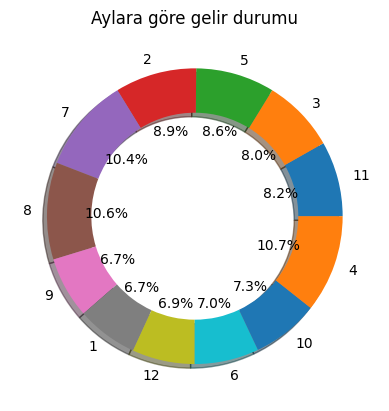

In [44]:
labels=data["Month"].unique()
views=data.groupby("Month")["Revenue"].sum()
plt.pie(views,labels=labels,autopct="%1.1f%%",shadow=True,wedgeprops={"width":0.3})
plt.title('Aylara göre gelir durumu')
plt.show()

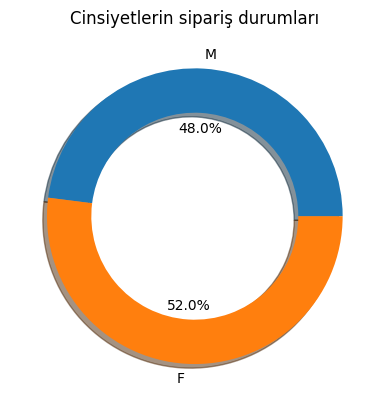

In [45]:
labels=data["Customer_Gender"].unique()
views=data.groupby("Customer_Gender")["Order_Quantity"].sum()
plt.pie(views,labels=labels,autopct="%1.1f%%",shadow=True,wedgeprops={"width":0.3})
plt.title('Cinsiyetlerin sipariş durumları')
plt.show()

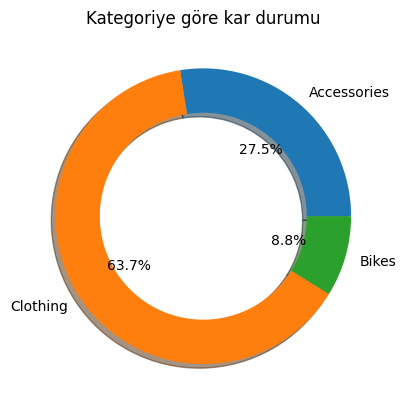

In [46]:
labels=data["Product_Category"].unique()
views=data.groupby("Product_Category")["Profit"].sum()
plt.pie(views,labels=labels,autopct="%1.1f%%",shadow=True,wedgeprops={"width":0.3})
plt.title('Kategoriye göre kar durumu')
plt.show()

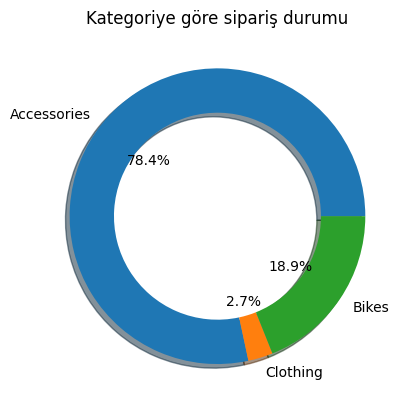

In [47]:
labels=data["Product_Category"].unique()
views=data.groupby("Product_Category")["Order_Quantity"].sum()
plt.pie(views,labels=labels,autopct="%1.1f%%",shadow=True,wedgeprops={"width":0.3})
plt.title('Kategoriye göre sipariş durumu')
plt.show()

In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113036 entries, 0 to 113035
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Customer_Age      113036 non-null  int64 
 1   Age_Group         113036 non-null  object
 2   Customer_Gender   113036 non-null  object
 3   Country           113036 non-null  object
 4   State             113036 non-null  object
 5   Product_Category  113036 non-null  object
 6   Sub_Category      113036 non-null  object
 7   Product           113036 non-null  object
 8   Order_Quantity    113036 non-null  int64 
 9   Unit_Cost         113036 non-null  int64 
 10  Unit_Price        113036 non-null  int64 
 11  Profit            113036 non-null  int64 
 12  Cost              113036 non-null  int64 
 13  Revenue           113036 non-null  int64 
 14  Year              113036 non-null  int32 
 15  Month             113036 non-null  int32 
 16  Weekday           113036 non-null  int

In [49]:
# One-Hot Encoding 
data_encoded = pd.get_dummies(data, columns=['Age_Group', 'Customer_Gender', 'Country', 'State', 'Product_Category', 'Sub_Category', 'Product'], drop_first=True)


In [50]:
# Aykırı değerleri temizlemek için IQR yöntemiyle bir fonksiyon oluştur
def remove_outliers_iqr(df, columns):
    df_cleaned = df.copy()  # Orijinal df'yi korumak için bir kopya oluştur
    for column in columns:
        Q1 = df_cleaned[column].quantile(0.25)
        Q3 = df_cleaned[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        # Her sütun için alt ve üst sınırların dışında kalan değerleri filtrele
        df_cleaned = df_cleaned[(df_cleaned[column] >= lower_bound) & (df_cleaned[column] <= upper_bound)]
    return df_cleaned


# Sayısal sütunları seç
numeric_columns = ['Customer_Age', 'Order_Quantity', 'Unit_Cost', 'Unit_Price', 'Profit', 'Cost', 'Revenue','Year','Month','Weekday']

# Aykırı değerleri temizle
data_cleaned = remove_outliers_iqr(data_encoded, numeric_columns)

# Sonuçları kontrol et
print("Aykırı değerlerden arındırılmış veri seti:", data_cleaned.describe())


Aykırı değerlerden arındırılmış veri seti:        Customer_Age  Order_Quantity    Unit_Cost    Unit_Price        Profit  \
count  67414.000000    67414.000000  67414.00000  67414.000000  67414.000000   
mean      35.665366       13.423859      5.62800     13.129854     64.211202   
std       11.015945        8.518806      7.02638     13.865042     67.241544   
min       17.000000        1.000000      1.00000      2.000000     -5.000000   
25%       27.000000        6.000000      2.00000      5.000000     16.000000   
50%       34.000000       13.000000      2.00000      5.000000     41.000000   
75%       43.000000       20.000000      8.00000     22.000000     83.000000   
max       65.000000       32.000000     42.00000     70.000000    299.000000   

               Cost       Revenue          Year         Month       Weekday  
count  67414.000000  67414.000000  67414.000000  67414.000000  67414.000000  
mean      55.641751    119.852953   2014.581437      6.454119      3.011007  
st

In [51]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_cleaned[numeric_columns] = scaler.fit_transform(data_cleaned[numeric_columns])

In [52]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from keras_tuner import RandomSearch  

ModuleNotFoundError: No module named 'tensorflow'

In [ ]:
# Özellikler (X) ve hedef değişkeni (y) belirle
X = data_cleaned.drop(columns=['Revenue'])  # Örneğin hedef değişken 'Revenue'
y = data_cleaned['Revenue']

# Eğitim ve test setlerine ayır
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
def build_model(hp):
    model = Sequential()
    # İlk gizli katmanı ekle (nöron sayısını hiperparametre olarak belirle)
    model.add(Dense(units=hp.Int('units', min_value=32, max_value=512, step=32), activation='relu', input_shape=(X_train.shape[1],)))
    
    # Dropout katmanı ekle (overfitting'i azaltmak için)
    model.add(Dropout(rate=hp.Float('dropout', min_value=0.1, max_value=0.5, step=0.1)))
    
    # Ekstra gizli katmanlar
    for i in range(hp.Int('num_layers', 1, 3)):  # 1-3 arasında katman sayısını değiştir
        model.add(Dense(units=hp.Int(f'units_{i}', min_value=32, max_value=512, step=32), activation='relu'))
        model.add(Dropout(rate=hp.Float(f'dropout_{i}', min_value=0.1, max_value=0.5, step=0.1)))
    
    # Çıkış katmanı
    model.add(Dense(1))
    
    # Modeli derle
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    return model


In [ ]:
print(X_train.dtypes)
print(y_train.dtypes)


In [ ]:
X_train = X_train.astype(float)
y_train = y_train.astype(float)

In [ ]:
from kerastuner.tuners import RandomSearch

# Tuner ayarlarını yap
tuner = RandomSearch(
    build_model,
    objective='val_mae',
    max_trials=5,
    executions_per_trial=3,
    directory='tuner_results',
    project_name='deep_learning_model')

# Modeli eğitme
tuner.search(X_train, y_train, epochs=50, validation_split=0.2, batch_size=32, verbose=1)

# En iyi modeli al
best_model = tuner.get_best_models(num_models=1)[0]

In [ ]:
X_test = X_test.astype(float)
y_test = y_test.astype(float)

In [ ]:
y_pred = best_model.predict(X_test)
y_pred

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Test setinde performans değerlendirmesi
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("Test Seti MAE:", mae)
print("Test Seti MSE:", mse)


In [ ]:
# Modeli kaydet
best_model.save("best_model.h5")